# Importing Libraries and Loading/Wrangling Data

In [ ]:
# !python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9 MB 1.2 MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-py3-none-any.whl size=829180942 sha256=6f83ae2d779921aa0da0751e7a9795743fbd03b164708037f43a1941a1a4b7b4
  Stored in directory: /tmp/pip-ephem-wheel-cache-cp4y3eob/wheels/11/95/ba/2c36cc368c0bd339b44a791c2c1881a1fb714b78c29a4cb8f5
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [22]:
!pip install category_encoders==2.*
# !pip install pandas-profiling==2.*

In [38]:
!pip uninstall scikit-learn
!pip install scikit-learn==0.24.2

Found existing installation: scikit-learn 0.22.2.post1
Uninstalling scikit-learn-0.22.2.post1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/scikit_learn-0.22.2.post1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/sklearn/*
Proceed (y/n)? y
  Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 22.3 MB 83.1 MB/s 


In [9]:
import pandas as pd
import numpy as np
import datetime as dt
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.pipeline import make_pipeline, Pipeline
# from category_encoders import OrdinalEncoder
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, \
                                    cross_val_score, \
                                    validation_curve, \
                                    GridSearchCV, \
                                    RandomizedSearchCV, \
                                    KFold
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix, roc_curve, plot_roc_curve
from xgboost import XGBClassifier

import re
import string

# import spacy
# nlp = spacy.load("en_core_web_lg")

from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

import lzma
import pickle

import warnings
warnings.filterwarnings('ignore')

# from pdpbox.pdp import pdp_isolate, pdp_plot, pdp_interact, pdp_interact_plot
# import shap

In [8]:
sklearn.__version__

'0.24.2'

In [10]:
# clone github repo
!git clone https://github.com/Spotify-Build-Week/SpotifyBuildWeek.git

fatal: destination path 'SpotifyBuildWeek' already exists and is not an empty directory.


In [11]:
# import pandas as pd
raw_df = pd.read_csv('/content/SpotifyBuildWeek/archive(3).zip')
raw_df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [ ]:
raw_df.info() #artist_name and

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [ ]:
#are there missing values
raw_df.isna().sum().sum()

0

In [12]:
# Applying the necessary data cleaning and feature engineering
# in one wrangle function.

def wrangle(df):
    # drop duplicate entries
    df = df.drop_duplicates(subset='track_id')
        
    # drop identifier column
    df = df.drop(columns='track_id')

    # remove '#' from the 'key'column
    df['key'] = df['key'].str.replace('#', '')

    # reindex dataframe (some indexes were lost due to dropping duplicate rows)
    df = df.reset_index()
    # drop the additional 'index' column which was created when reindexing
    df.drop(columns='index', inplace=True)

    return df


In [14]:
df = wrangle(raw_df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176774 entries, 0 to 176773
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             176774 non-null  object 
 1   artist_name       176774 non-null  object 
 2   track_name        176774 non-null  object 
 3   popularity        176774 non-null  int64  
 4   acousticness      176774 non-null  float64
 5   danceability      176774 non-null  float64
 6   duration_ms       176774 non-null  int64  
 7   energy            176774 non-null  float64
 8   instrumentalness  176774 non-null  float64
 9   key               176774 non-null  object 
 10  liveness          176774 non-null  float64
 11  loudness          176774 non-null  float64
 12  mode              176774 non-null  object 
 13  speechiness       176774 non-null  float64
 14  tempo             176774 non-null  float64
 15  time_signature    176774 non-null  object 
 16  valence           17

In [ ]:
df.head()

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0,0.611,0.389,99373,0.910,0.000,C,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),1,0.246,0.590,137373,0.737,0.000,F,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0,0.703,0.240,152427,0.326,0.000,C,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


# *Jessy's Section - Visualization*

In [ ]:
genre = df['genre'].unique()
print(sorted(genre))

['A Capella', 'Alternative', 'Anime', 'Blues', "Children's Music", 'Children’s Music', 'Classical', 'Comedy', 'Country', 'Dance', 'Electronic', 'Folk', 'Hip-Hop', 'Indie', 'Jazz', 'Movie', 'Opera', 'Pop', 'R&B', 'Rap', 'Reggae', 'Reggaeton', 'Rock', 'Ska', 'Soul', 'Soundtrack', 'World']


In [ ]:
#popularity by genre
df.groupby('genre')['popularity'].mean()

genre
A Capella            9.302521
Alternative         50.257944
Anime               24.256184
Blues               33.683851
Children's Music     4.245650
Children’s Music    52.302465
Classical           29.320170
Comedy              21.320240
Country             44.248679
Dance               57.351541
Electronic          37.592305
Folk                49.671347
Hip-Hop             58.516660
Indie               53.528933
Jazz                39.885060
Movie               12.146629
Opera               13.335628
Pop                 67.064957
R&B                 48.463665
Rap                 59.515797
Reggae              35.390123
Reggaeton           36.480290
Rock                58.767849
Ska                 27.441063
Soul                43.491874
Soundtrack          33.681958
World               34.416029
Name: popularity, dtype: float64

In [ ]:
# sort the most commom genres
n = 30
top_30=pd.DataFrame(df['genre'].value_counts()[:n]).reset_index()
top_30.rename(columns = {'index':'Genres','genre':'Total_Count'}, inplace = True)
top_30

,Genres,Total_Count
0,Comedy,9674
1,Electronic,9149
2,Alternative,9095
3,Anime,8935
4,Classical,8711
5,Reggae,8687
6,Reggaeton,8549
7,Blues,8496
8,Soundtrack,8480
9,Opera,8280


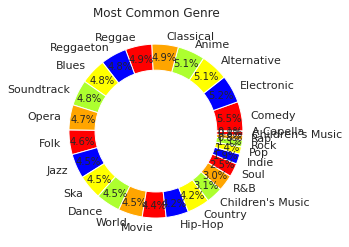

In [ ]:
# library
import matplotlib.pyplot as plt  
  
# Setting size in Chart based on 
# given values
sizes = top_30['Total_Count']
  
# Setting labels for items in Chart
labels = top_30['Genres']
  
# colors
colors = ['#FF0000', '#0000FF', '#FFFF00', '#ADFF2F',
          '#FFA500']
  
# Pie Chart
plt.pie(sizes, colors=colors, labels=labels,
        autopct='%1.1f%%', pctdistance=0.85)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Most Common Genre')
    
# Displaing Chart
plt.show()

In [ ]:
#top 20 most popular songs
most_popular = df.query('popularity>90', inplace=False).sort_values('popularity', ascending=False)
most_popular[:20]

,level_0,index,genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
8977,8977,9027,Dance,100,0.5780,0.725,178640,0.321,0.000000,C,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
8976,8976,9026,Dance,99,0.0421,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335
78445,78445,86951,Rap,99,0.1630,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385
61337,61337,66643,Hip-Hop,98,0.1100,0.737,193227,0.860,0.000002,G,0.0574,-2.652,Minor,0.0593,93.989,4/4,0.656
88856,88856,107875,Pop,97,0.3230,0.826,238200,0.773,0.000000,B,0.1430,-4.218,Minor,0.0524,126.899,4/4,0.761
88843,88843,107810,Pop,97,0.4500,0.741,171030,0.520,0.000002,G,0.2220,-7.513,Major,0.0656,102.998,4/4,0.347
88844,88844,107812,Pop,97,0.1910,0.687,214290,0.792,0.000000,F,0.1670,-2.749,Major,0.0452,100.015,4/4,0.671
8987,8987,9037,Dance,97,0.0691,0.719,187436,0.704,0.000000,C,0.1660,-4.724,Major,0.0476,133.002,4/4,0.628
78446,78446,86953,Rap,97,0.5560,0.760,158040,0.479,0.000000,D,0.0703,-5.574,Major,0.0466,89.911,4/4,0.913
8978,8978,9028,Dance,97,0.2970,0.752,201661,0.488,0.000009,F,0.0936,-7.050,Major,0.0705,136.041,4/4,0.533


In [ ]:
popular_genre = raw_df.sort_values(by=['genre'], ascending=False).reset_index()
popular_genre[:10]

raw_df.query('popularity>90', inplace=False).sort_values('popularity', ascending=False)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
107804,Pop,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
9027,Dance,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
9026,Dance,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335
86951,Rap,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385
107803,Pop,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107826,Pop,Cardi B,Please Me,0PG9fbaaHFHfre2gUVo7AN,91,0.0642,0.747,200890,0.570,0.000000,C#,0.0832,-6.711,Major,0.0810,133.992,4/4,0.650
86962,Rap,A Boogie Wit da Hoodie,Swervin (feat. 6ix9ine),1wJRveJZLSb1rjhnUHQiv6,91,0.0153,0.581,189487,0.662,0.000000,A,0.1110,-5.239,Major,0.3030,93.023,4/4,0.434
9030,Dance,Ariana Grande,NASA,4uTvPEr01pjTbZgl7jcKBD,91,0.4510,0.747,182000,0.458,0.000000,F#,0.2520,-6.891,Major,0.3030,75.029,4/4,0.470
86960,Rap,Juice WRLD,Robbery,44ShclXTOOnYtt5CnCDeGV,91,0.3420,0.708,240527,0.691,0.000000,D,0.2220,-5.179,Major,0.0442,79.990,4/4,0.535


In [ ]:
import plotly.graph_objects as go    #importing the library

matrix=raw_df.corr()  #returns a matrix with correlation of all features
x_list=['popularity','duration_ms','explicit',
        'danceability','energy','key','loudness',
        'mode','speechiness','acousticness','instrumentalness',
        'liveness','valence','tempo','time_signature']

fig_heatmap = go.Figure(data=go.Heatmap(
                   z=matrix,
                   x=x_list,
                   y=x_list,
                   hoverongaps = False))
fig_heatmap.update_layout(margin = dict(t=200,r=200,b=200,l=200),
    width = 800, height = 650,
    autosize = False )

fig_heatmap.show()

In [ ]:
#analyze the correlation between popularity and danceability
#create a df that has the popularity for different songs grouped by the mean of the danceability score
df_dance=raw_df.groupby('popularity')['danceability'].mean().sort_values(ascending=[False]).reset_index()
df_dance.head()

,popularity,danceability
0,94,0.803857
1,96,0.801625
2,93,0.788000
3,99,0.779500
4,95,0.749545


In [ ]:
import plotly.express as px   #importing plotly
fig2 = px.scatter(df_dance, x="popularity", y="danceability", color="danceability",size='popularity')
fig2.show()

In [ ]:
#analyze the correlation between popularity and loudness
#create a df that has the loudness for different songs grouped by the mean of the danceability score
df_loud=raw_df.groupby('popularity')['loudness'].mean().sort_values(ascending=[False]).reset_index()
df_loud.head()

,popularity,loudness
0,98,-2.652000
1,95,-5.069818
2,94,-5.225429
3,91,-5.339933
4,88,-5.462610


In [ ]:
fig2 = px.scatter(df_loud, x="popularity", y="loudness", color="loudness",size='popularity')
fig2.show()

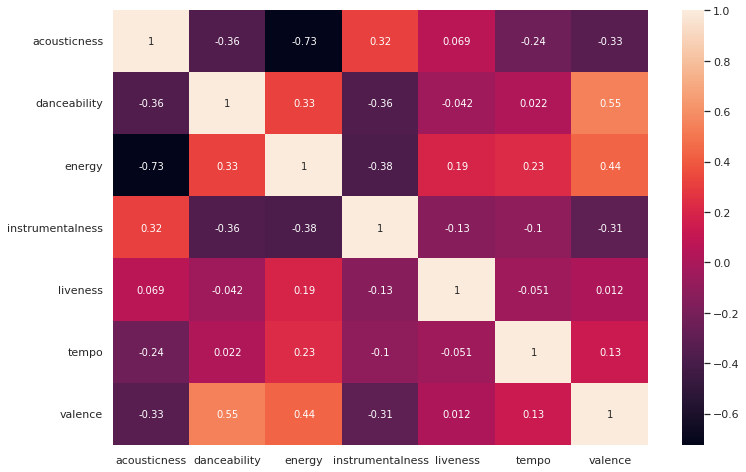

In [ ]:
#correlation of factors
corr = raw_df[['acousticness','danceability','energy',
'instrumentalness','liveness','tempo','valence']].corr()
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)

In [ ]:
#check top 10 artists in terms of average energy per song and compare the results with their average acousticness values
raw_df[['artist_name','energy','acousticness']].groupby('artist_name').mean().sort_values(by='energy', ascending=False)[:10]

,energy,acousticness
artist_name,,
Caramell,0.999000,0.013600
Like Moths To Flames,0.997000,0.003790
Flat Duo Jets,0.997000,0.193000
Culture Beat,0.997000,0.072600
Vektor,0.995000,0.000440
Lil Texas,0.994714,0.006494
Adam Ant,0.991000,0.028900
The Easybeats,0.991000,0.380000
The Shamen,0.990000,0.003060


In [ ]:
#how the characteristics of songs change over popularity
popularity_avg = raw_df[['danceability','energy','liveness','acousticness', 'valence','popularity']].groupby('popularity').mean().sort_values(by='popularity').reset_index()
popularity_avg.head()

,popularity,danceability,energy,liveness,acousticness,valence
0,0,0.570527,0.352737,0.201675,0.670494,0.535000
1,1,0.609421,0.409989,0.210942,0.592061,0.594235
2,2,0.541429,0.346731,0.218825,0.668294,0.501990
3,3,0.499971,0.336404,0.222869,0.702077,0.441619
4,4,0.447783,0.306701,0.234592,0.747717,0.372012


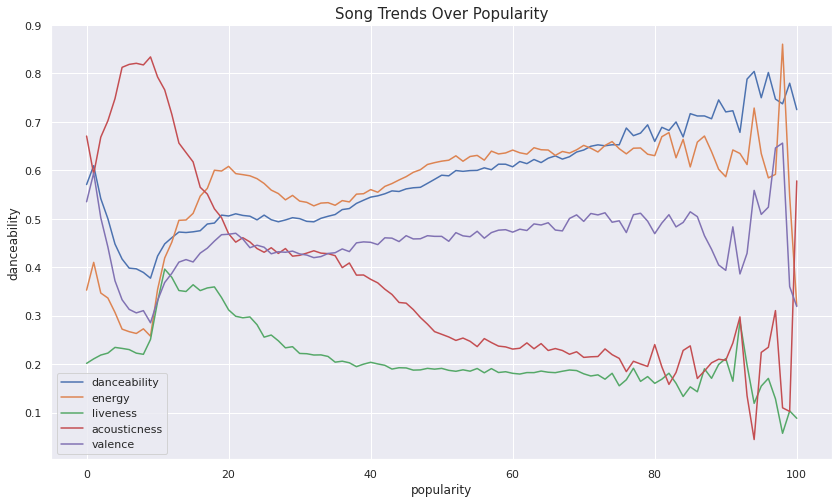

In [ ]:
plt.figure(figsize=(14,8))
plt.title("Song Trends Over Popularity", fontsize=15)
lines = ['danceability','energy','liveness','acousticness','valence']
for line in lines:
    ax = sns.lineplot(x='popularity', y=line, data=popularity_avg)
plt.legend(lines)

In [ ]:
raw_df.artist_name.nunique()


14564

In [ ]:
raw_df.artist_name.value_counts()[:10]

Giuseppe Verdi             1394
Giacomo Puccini            1137
Kimbo Children's Music      971
Nobuo Uematsu               825
Richard Wagner              804
Wolfgang Amadeus Mozart     800
Randy Newman                757
Georges Bizet               701
Juice Music                 684
Johann Sebastian Bach       632
Name: artist_name, dtype: int64

In [ ]:
artist_list = raw_df.artist_name.value_counts().index[:10]
artist_list

Index(['Giuseppe Verdi', 'Giacomo Puccini', 'Kimbo Children's Music',
       'Nobuo Uematsu', 'Richard Wagner', 'Wolfgang Amadeus Mozart',
       'Randy Newman', 'Georges Bizet', 'Juice Music',
       'Johann Sebastian Bach'],
      dtype='object')

In [ ]:
df_artists = raw_df[raw_df.artist_name.isin(artist_list)][['artist_name','popularity',
                                                        'energy']].groupby(['artist_name','popularity']).count().reset_index()
df_artists.rename(columns={'energy':'song_count'}, inplace=True)
df_artists.head()

,artist_name,popularity,song_count
0,Georges Bizet,2,1
1,Georges Bizet,3,8
2,Georges Bizet,4,17
3,Georges Bizet,5,18
4,Georges Bizet,6,31


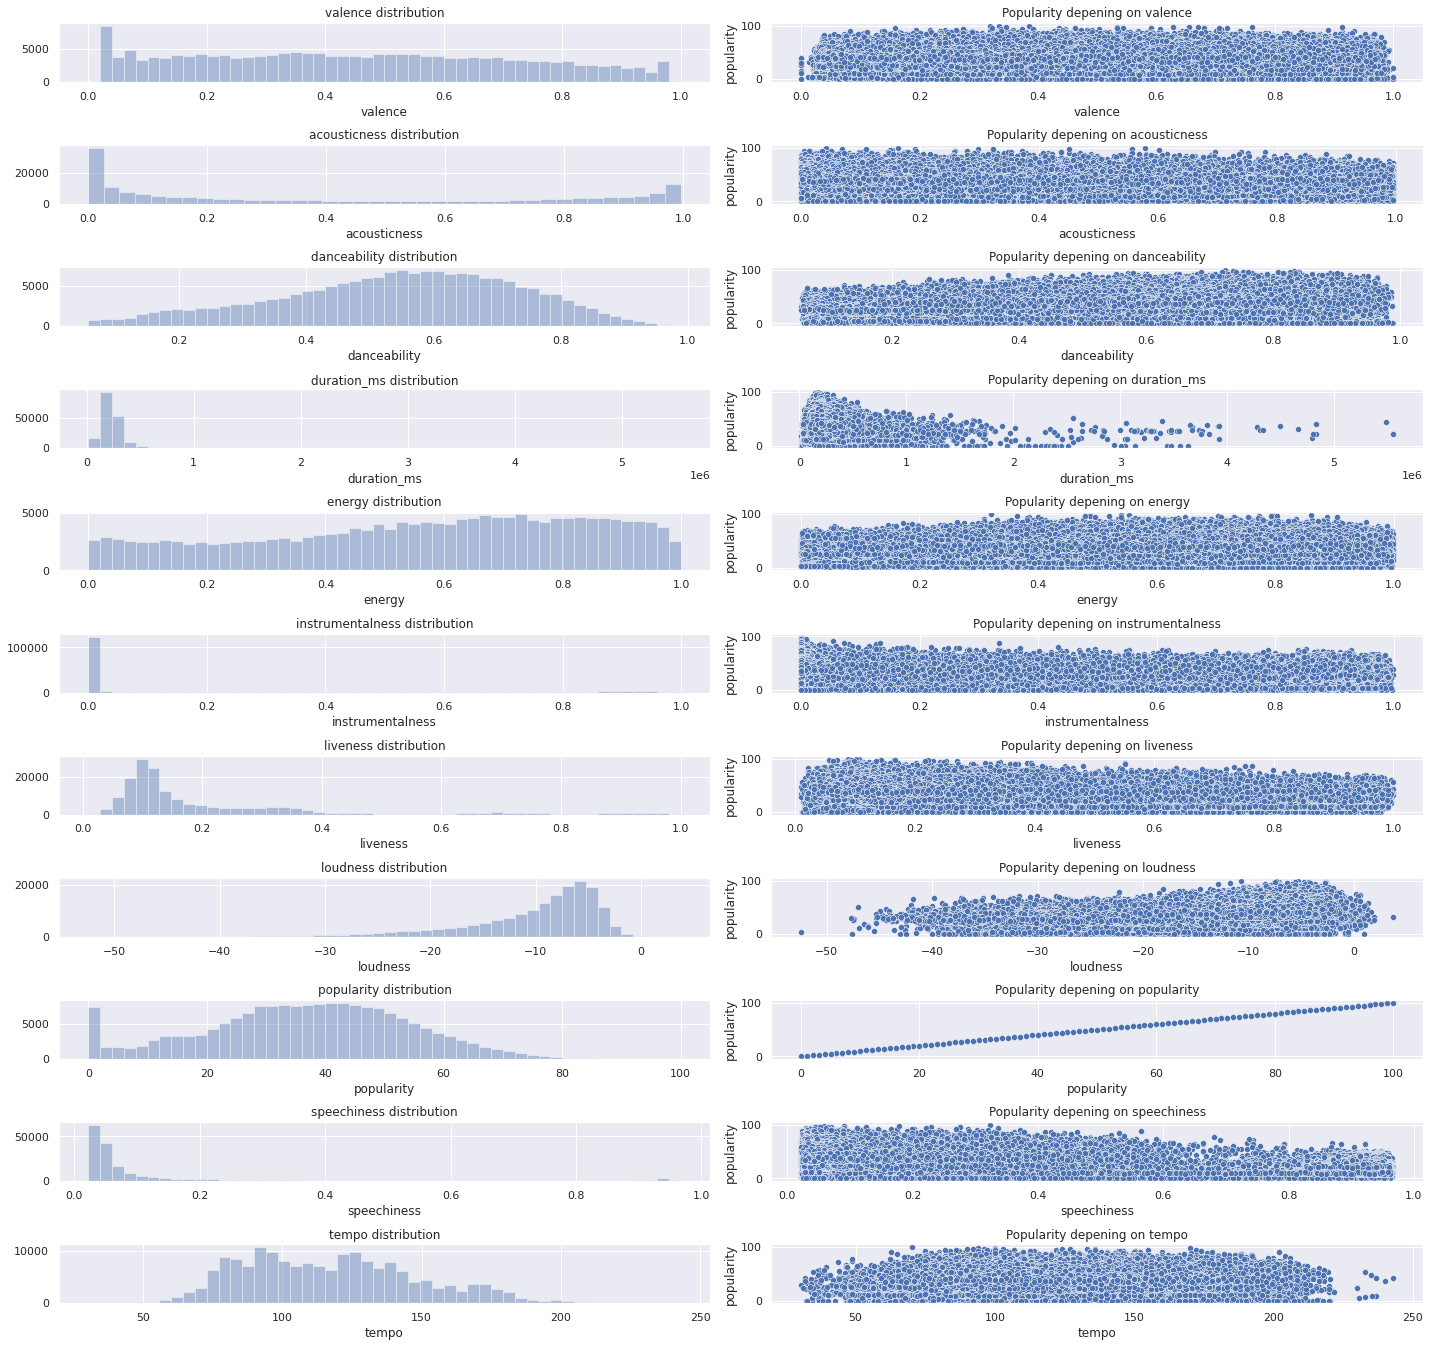

In [ ]:
plt.figure(figsize=(20,20))
count=1
xy_columns = ['valence', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'popularity', 'speechiness', 'tempo']
x_columns = ['valence', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo']

for xvar in xy_columns:
    plt.subplot(12,2, count);
    count += 1
    plt.gca().set_title(xvar + ' distribution');
    sns.distplot(a=df[xvar], kde=False);
    plt.subplot(12,2,count);
    count +=1
    plt.gca().set_title('Popularity depening on ' + xvar);
    sns.scatterplot(x=df[xvar], y=df.popularity);
    #sns.kdeplot(data=data_num[[xvar, 'popularity']], hue="kind", fill=True)
    #mean_df = df.groupby([xvar])['popularity'].mean().to_frame().reset_index()
    #sns.scatterplot(x=mean_df[xvar], y=mean_df.popularity, data=mean_df)

#plt.subplots_adjust(space = 0.5)
plt.tight_layout()

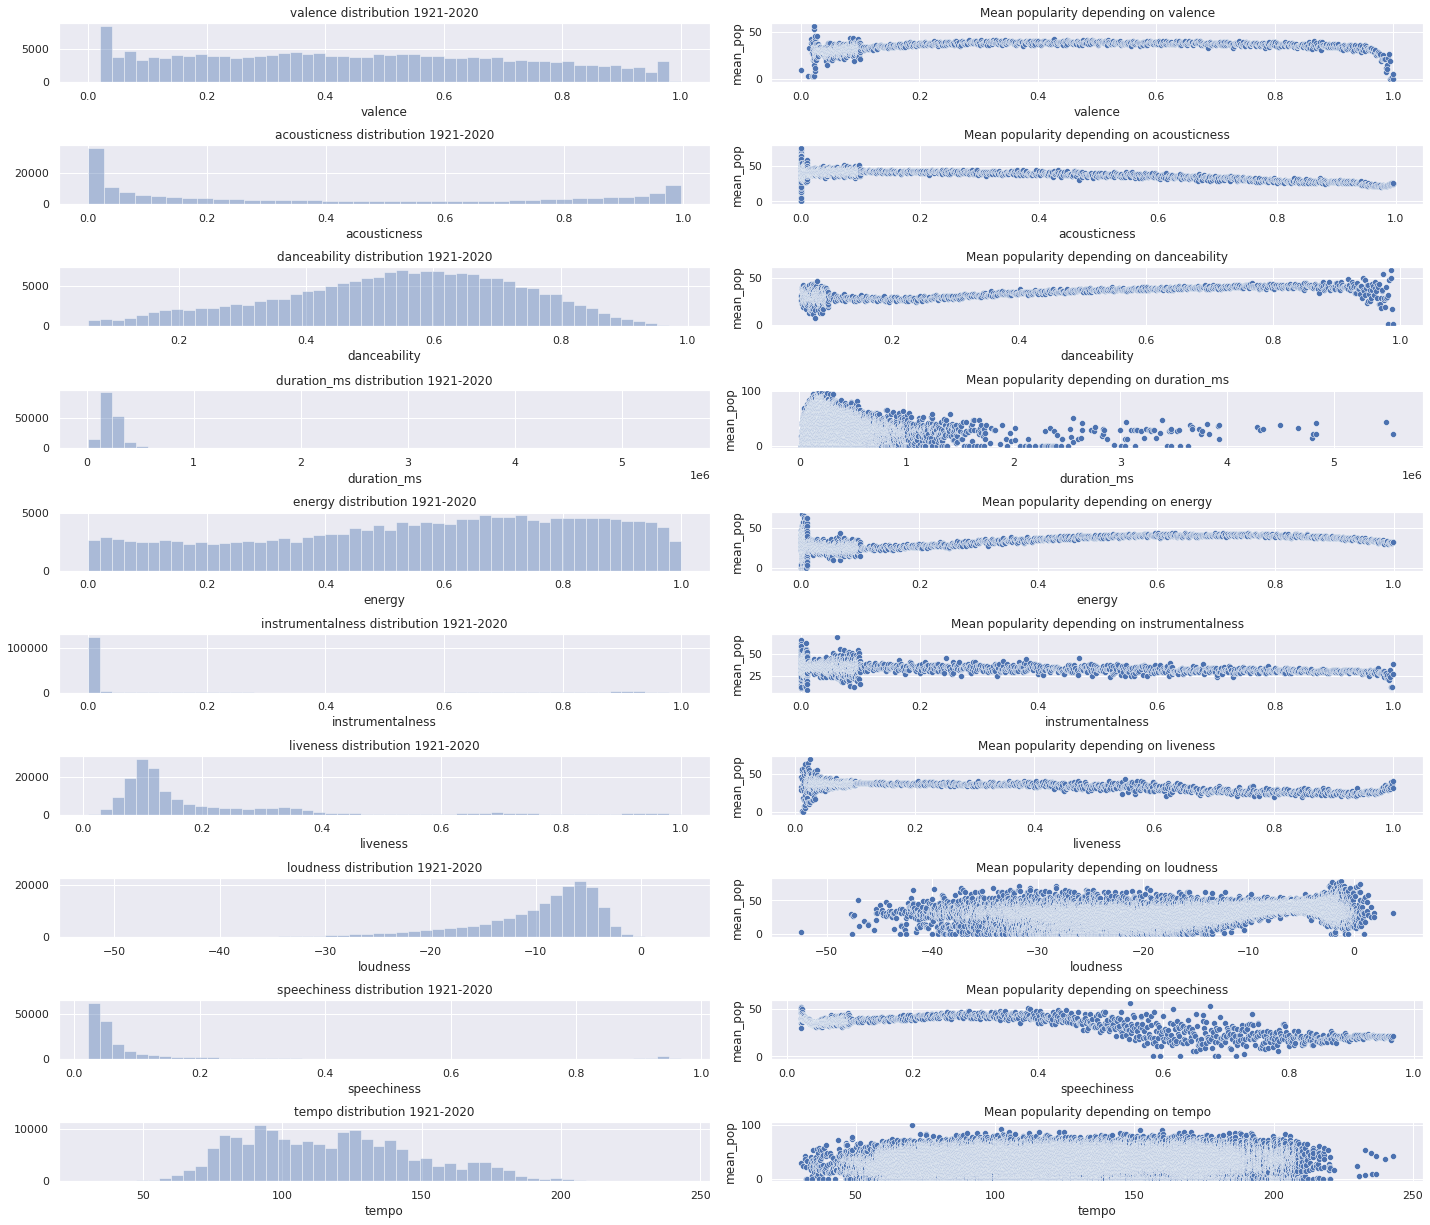

In [ ]:
#Mean popularity data scatter plots
plt.figure(figsize=(20,20))
count=1

for xvar in x_columns:
    plt.subplot(12,2, count);
    count += 1
    plt.gca().set_title(xvar + ' distribution 1921-2020');
    sns.distplot(a=df[xvar], kde=False);
    plt.subplot(12,2,count);
    count +=1
    plt.gca().set_title('Mean popularity depending on ' + xvar);
    #sns.scatterplot(x=df[xvar], y=df.popularity);
    #sns.kdeplot(data=data_num[[xvar, 'popularity']], hue="kind", fill=True)
    mean_df = df.groupby([xvar])['popularity'].mean().to_frame().reset_index()
    mean_df['mean_pop'] = mean_df['popularity']
    sns.scatterplot(x=mean_df[xvar], y=mean_df.mean_pop)

#plt.subplots_adjust(space = 0.5)
plt.tight_layout()

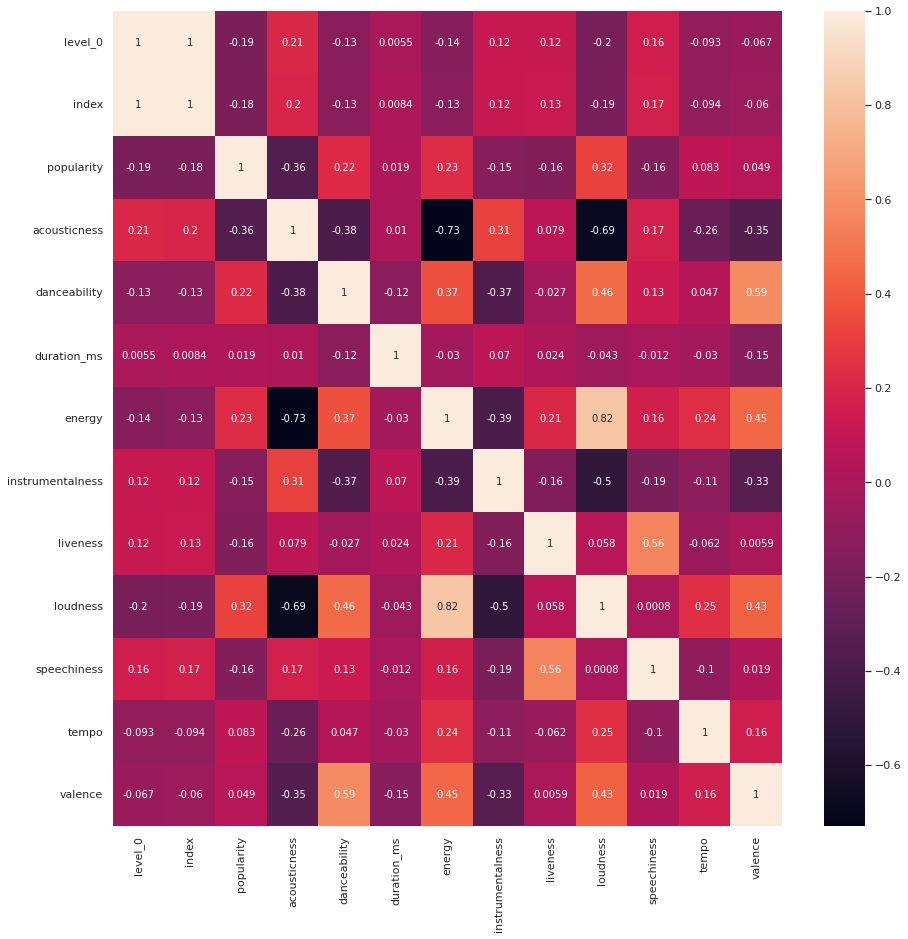

In [ ]:
# Looking at correlations
plt.figure(figsize = (15,15)) #creating the 'canvas'
sns.heatmap(df.corr(), annot=True)

# Madina's Section

## Tokenization and Vectorization for later use in NLP

In [ ]:
def tokenizer(text):
    """
    Use the pre-trained model from Space to tokenize our text into lemmas 
    
    Notes
    -----
    Rememeber that the pre-trained spaCy model has a lot of built in flags for what kind of token each token is
    so we can use that functionality to create filters for stop words, white spaces, punctuation, and so on!
    
    See list of flags here: https://spacy.io/api/token#attributes
    
    Parameter
    ---------
    text: string
        Full text article/document that needs to be tokenized 
    """
    tokens = []
    for token in nlp(text):
        # if statement will filter out stopwords, punctuation, and whitespace
        # COMPLETE THE CODE HERE
        if (token.is_stop != True) & (token.is_punct != True ) & (token.is_space != True) & (token.is_digit != True):
            # Now lemmatize!
            tokens.append(token.lemma_)
    
    return ' '.join(tokens)

In [ ]:
# tokenize 'track_name' column (for later use in NLP)
df['lemmas_track_name'] = df['track_name'].apply(tokenizer)

In [ ]:
df.head()

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,lemmas_track_name
0,Movie,Henri Salvador,C'est beau de faire un Show,0,0.611,0.389,99373,0.910,0.000,C,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,C'est beau de faire un
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),1,0.246,0.590,137373,0.737,0.000,F,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,Perdu d'avance par Gad Elmaleh
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,let lonely tonight
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0,0.703,0.240,152427,0.326,0.000,C,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,Dis moi Monsieur Gordon Cooper
4,Movie,Fabien Nataf,Ouverture,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,ouverture


In [ ]:
def vectorize(text):
    """Vectorize the tokenized text"""
    return nlp(text).vector

In [ ]:
# apply vectorize function to 'track_name' column (for later use in NLP)
df['vec_track_name'] = df['track_name'].apply(vectorize)

In [ ]:
df.head()

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0,0.611,0.389,99373,0.910,0.000,C,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),1,0.246,0.590,137373,0.737,0.000,F,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0,0.703,0.240,152427,0.326,0.000,C,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [ ]:
df.to_csv('tokenized-vectorized-df')

In [ ]:
df.to_csv("tokenized-vectorized-compr-df.csv.zip", 
           index=False, 
           compression="zip")

In [ ]:
import sys
sys.getsizeof(df) / 1e6

85.237045

## Build NearestNeighbors model (first trying a model w/o NLP or any text columns)

In [15]:
# drop text columns
df1 = df.drop(columns=['artist_name', 'track_name'])

In [16]:
# encode the entire dataset
enc = OrdinalEncoder()
df_encoded = enc.fit_transform(df1)
df_encoded.head()

,genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,1,0,0.611,0.389,99373,0.910,0.000,1,0.3460,-1.828,1,0.0525,166.969,1,0.814
1,1,1,0.246,0.590,137373,0.737,0.000,2,0.1510,-5.559,2,0.0868,174.003,1,0.816
2,1,3,0.952,0.663,170267,0.131,0.000,1,0.1030,-13.879,2,0.0362,99.488,2,0.368
3,1,0,0.703,0.240,152427,0.326,0.000,1,0.0985,-12.178,1,0.0395,171.758,1,0.227
4,1,4,0.950,0.331,82625,0.225,0.123,2,0.2020,-21.150,1,0.0456,140.576,1,0.390


In [17]:
# scale the entire dataset
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded.values), columns=df1.columns)
df_scaled.head()

,genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.0,0.00,0.613454,0.356292,0.015167,0.910909,0.000000,0.000000,0.339614,0.900856,0.0,0.032070,0.642704,0.00,0.814
1,0.0,0.01,0.246988,0.571934,0.022029,0.737732,0.000000,0.166667,0.142710,0.834469,1.0,0.068374,0.675801,0.00,0.816
2,0.0,0.03,0.955823,0.650252,0.027969,0.131113,0.000000,0.000000,0.094241,0.686429,1.0,0.014818,0.325182,0.25,0.368
3,0.0,0.00,0.705823,0.196438,0.024747,0.326313,0.000000,0.000000,0.089697,0.716695,0.0,0.018311,0.665238,0.00,0.227
4,0.0,0.04,0.953815,0.294067,0.012142,0.225209,0.123123,0.166667,0.194208,0.557054,0.0,0.024767,0.518516,0.00,0.390


In [18]:
# create an input variable for the model (query input for NearestNeighbors)
# reshape the input
user_input = df_scaled.iloc[0].values.reshape(1,-1)

In [19]:
user_input.shape

(1, 15)

In [20]:
# build and fit nearestneighbors model
model = NearestNeighbors(n_neighbors=6, algorithm='kd_tree')
model.fit(df_scaled)

# get outputs from the model
n_dist, n_ind = model.kneighbors(user_input)

# convert the outputs into pandas series and display the results
similar = pd.Series(index=n_ind[0], data=n_dist[0]).sort_values()
print(similar)

# display the corresponding songs from the ENCODED/SCALED dataset
df_similar_scaled = df_scaled.loc[similar.index.to_list()]
print(df_similar_scaled)

# display the corresponding songs from the ORIGINAL dataset
df_similar_orig = df.loc[similar.index.to_list()]
df_similar_orig

0         0.000000
52746     0.263636
423       0.285414
52681     0.285951
149593    0.309516
150200    0.330388
dtype: float64
        genre  popularity  acousticness  ...     tempo  time_signature  valence
0         0.0        0.00      0.613454  ...  0.642704             0.0    0.814
52746     0.0        0.01      0.667671  ...  0.760173             0.0    0.968
423       0.0        0.00      0.656627  ...  0.460875             0.0    0.689
52681     0.0        0.01      0.627510  ...  0.687179             0.0    0.959
149593    0.0        0.04      0.588353  ...  0.617596             0.0    0.838
150200    0.0        0.01      0.734940  ...  0.604934             0.0    0.937

[6 rows x 15 columns]


,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0,0.611,0.389,99373,0.910,0.00000,C,0.346,-1.828,Major,0.0525,166.969,4/4,0.814
52746,Movie,Dorothée,Toute ma vie j'ai chanté du rock'n'roll,1,0.665,0.480,157000,0.860,0.00002,C,0.337,-9.047,Major,0.0384,191.934,4/4,0.968
423,Movie,Chorus,Aarti Kunj Bihari Ki,0,0.654,0.470,259293,0.802,0.00000,C,0.342,-7.585,Major,0.0696,128.326,4/4,0.689
52681,Movie,Dorothée,Petit vaurien - Version country,1,0.625,0.542,227667,0.807,0.00912,C,0.457,-6.648,Major,0.0347,176.421,4/4,0.959
149593,Movie,Donny Osmond,Mona Lisa,4,0.586,0.510,150707,0.865,0.00000,F,0.145,-5.110,Major,0.0826,161.633,4/4,0.838
150200,Movie,Hayley Mills,Green And Yellow Basket,1,0.732,0.415,121827,0.669,0.00000,C,0.327,-8.445,Major,0.1160,158.942,4/4,0.937


In [ ]:
def generate_output(song, artist, orig_df, scaled_df, model):
    """Take user input, locate it in our datasets,
    reshape it and run through the model.
    Return track names and artist names of 5 most similar songs"""

    # locate user input in our datasets and reshape it
    orig_input = orig_df.loc[(orig_df['track_name'] == song) & (orig_df['artist_name'] == artist)]
    scaled_input = scaled_df.loc[orig_input.index[0]]
    reshaped_input = scaled_input.values.reshape(1, -1)

    # run reshaped input through the model
    n_dist_, n_ind_ = model.kneighbors(reshaped_input)

    # get 5 most similar songs as the output
    output = df[['track_name','artist_name']].loc[list(n_ind_[0][1:])]

    return output

In [ ]:
output = generate_output('Mona Lisa', 'Donny Osmond', df, df_scaled)
output

,track_name,artist_name
148902,Les chevaliers du zodiaque,Le Club des Juniors
149181,Together,Donny Osmond
149481,"A Little Bit Me, A Little Bit You",Donny Osmond
150603,Il est parfait,Bernard Minet
150923,Tout l'amour du monde,Bernard Minet


In [21]:
# compress the model with lzma and save it into a pickle file
with lzma.open("model2.xz", "wb") as f:
    pickle.dump(model, f)

In [ ]:
# load the pickled and compressed model
with lzma.open("model2.xz", "rb") as f:
    loaded_model = pickle.load(f)

In [ ]:
# test out the loaded model
test_output = generate_output('Mona Lisa', 'Donny Osmond', df, df_scaled, loaded_model)
test_output

,track_name,artist_name
148902,Les chevaliers du zodiaque,Le Club des Juniors
149181,Together,Donny Osmond
149481,"A Little Bit Me, A Little Bit You",Donny Osmond
150603,Il est parfait,Bernard Minet
150923,Tout l'amour du monde,Bernard Minet


## Incorporate NLP into the model (ended up not using NLP as it hurt model performance)

In [ ]:
df2 = df.drop(columns=['track_name', 'lemmas_track_name'])
df2.head(2)

,genre,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,vec_track_name
0,Movie,Henri Salvador,0,0.611,0.389,99373,0.910,0.0,C,0.346,-1.828,Major,0.0525,166.969,4/4,0.814,"[-0.245025, -0.08388365, -0.14367951, -0.17653..."
1,Movie,Martin & les fées,1,0.246,0.590,137373,0.737,0.0,F,0.151,-5.559,Minor,0.0868,174.003,4/4,0.816,"[-0.17479715, -0.00020662429, -0.077368855, -0..."


In [ ]:
# encode entire dataset for model 2
enc2 = OrdinalEncoder()
encoded = enc2.fit_transform(df2[['genre','artist_name','key','mode','time_signature']])
df2_encoded = pd.concat([df2.drop(columns=['genre','artist_name','key','mode','time_signature']), encoded], axis=1)
df2_encoded.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,vec_track_name,genre,artist_name,key,mode,time_signature
0,0,0.611,0.389,99373,0.910,0.000,0.3460,-1.828,0.0525,166.969,0.814,"[-0.245025, -0.08388365, -0.14367951, -0.17653...",1,1,1,1,1
1,1,0.246,0.590,137373,0.737,0.000,0.1510,-5.559,0.0868,174.003,0.816,"[-0.17479715, -0.00020662429, -0.077368855, -0...",1,2,2,2,1
2,3,0.952,0.663,170267,0.131,0.000,0.1030,-13.879,0.0362,99.488,0.368,"[0.03159314, 0.19661544, -0.37042284, 0.085588...",1,3,1,2,2
3,0,0.703,0.240,152427,0.326,0.000,0.0985,-12.178,0.0395,171.758,0.227,"[-0.17355834, 0.16033268, 0.008120005, -0.2522...",1,1,1,1,1
4,4,0.950,0.331,82625,0.225,0.123,0.2020,-21.150,0.0456,140.576,0.390,"[-0.33838, 0.23054, -0.50592, 0.64268, 0.11116...",1,4,2,1,1


In [ ]:
# scale entire dataset for model 2
scaler2 = MinMaxScaler()
scaled = pd.DataFrame(scaler2.fit_transform(df2_encoded.drop(columns='vec_track_name').values), columns=['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'genre', 'artist_name', 'key', 'mode',
       'time_signature'])
df2_scaled = pd.concat([scaled, df2_encoded['vec_track_name']], axis=1)
df2_scaled.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre,artist_name,key,mode,time_signature,vec_track_name
0,0.00,0.613454,0.356292,0.015167,0.910909,0.000000,0.339614,0.900856,0.032070,0.642704,0.814,0.0,0.000000,0.000000,0.0,0.00,"[-0.245025, -0.08388365, -0.14367951, -0.17653..."
1,0.01,0.246988,0.571934,0.022029,0.737732,0.000000,0.142710,0.834469,0.068374,0.675801,0.816,0.0,0.000069,0.166667,1.0,0.00,"[-0.17479715, -0.00020662429, -0.077368855, -0..."
2,0.03,0.955823,0.650252,0.027969,0.131113,0.000000,0.094241,0.686429,0.014818,0.325182,0.368,0.0,0.000137,0.000000,1.0,0.25,"[0.03159314, 0.19661544, -0.37042284, 0.085588..."
3,0.00,0.705823,0.196438,0.024747,0.326313,0.000000,0.089697,0.716695,0.018311,0.665238,0.227,0.0,0.000000,0.000000,0.0,0.00,"[-0.17355834, 0.16033268, 0.008120005, -0.2522..."
4,0.04,0.953815,0.294067,0.012142,0.225209,0.123123,0.194208,0.557054,0.024767,0.518516,0.390,0.0,0.000206,0.166667,0.0,0.00,"[-0.33838, 0.23054, -0.50592, 0.64268, 0.11116..."


In [ ]:
# create an input variable for model 2 (query input for NearestNeighbors)
# reshape the input
user_input2 = df2_scaled.iloc[0].values.reshape(1,-1)
user_input2.shape

(1, 17)

In [ ]:
# build and fit nearestneighbors model2 (MODEL DOESN'T SEET TO ACCEPT VECTORIZED INPUT)
model2 = NearestNeighbors(n_neighbors=6, algorithm='kd_tree')
model2.fit(df2_scaled)

# get outputs from the model
n_dist2, n_ind2 = model2.kneighbors(user_input2)

# convert the outputs into pandas series and display the results
similar2 = pd.Series(index=n_ind2[0], data=n_dist2[0]).sort_values()
print(similar2)

# display the corresponding songs from the ENCODED/SCALED dataset
df2_similar_scaled = df2_scaled.loc[similar2.index.to_list()]
print(df2_similar_scaled)

# display the corresponding songs from the ORIGINAL dataset
df2_similar_orig = df.loc[similar2.index.to_list()]
df2_similar_orig

## Incorporate encoded 'artist_name' and 'track_name' into the model (ended up not using these features as it hurt model performance)

In [ ]:
df3 = df.drop(columns=['lemmas_track_name', 'vec_track_name'])
df3.head()

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0,0.611,0.389,99373,0.910,0.000,C,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),1,0.246,0.590,137373,0.737,0.000,F,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0,0.703,0.240,152427,0.326,0.000,C,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [ ]:
# encode entire dataset for model 3
enc3 = OrdinalEncoder()
df3_encoded = enc3.fit_transform(df3)

# scale entire dataset for model 3
scaler3 = MinMaxScaler()
df3_scaled = pd.DataFrame(scaler3.fit_transform(df3_encoded.values), columns=df3.columns)
df3_scaled.head()

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.0,0.000000,0.000000,0.00,0.613454,0.356292,0.015167,0.910909,0.000000,0.000000,0.339614,0.900856,0.0,0.032070,0.642704,0.00,0.814
1,0.0,0.000069,0.000007,0.01,0.246988,0.571934,0.022029,0.737732,0.000000,0.166667,0.142710,0.834469,1.0,0.068374,0.675801,0.00,0.816
2,0.0,0.000137,0.000013,0.03,0.955823,0.650252,0.027969,0.131113,0.000000,0.000000,0.094241,0.686429,1.0,0.014818,0.325182,0.25,0.368
3,0.0,0.000000,0.000020,0.00,0.705823,0.196438,0.024747,0.326313,0.000000,0.000000,0.089697,0.716695,0.0,0.018311,0.665238,0.00,0.227
4,0.0,0.000206,0.000027,0.04,0.953815,0.294067,0.012142,0.225209,0.123123,0.166667,0.194208,0.557054,0.0,0.024767,0.518516,0.00,0.390


In [ ]:
# create an input variable for model 3 (query input for NearestNeighbors)
# reshape the input
user_input3 = df3_scaled.iloc[0].values.reshape(1,-1)
user_input3.shape

(1, 17)

In [ ]:
# build and fit nearestneighbors model3
model3 = NearestNeighbors(n_neighbors=6, algorithm='kd_tree')
model3.fit(df3_scaled)

# get outputs from the model
n_dist3, n_ind3 = model3.kneighbors(user_input3)

# convert the outputs into pandas series and display the results
similar3 = pd.Series(index=n_ind3[0], data=n_dist3[0]).sort_values()
print(similar3)

# display the corresponding songs from the ENCODED/SCALED dataset
df3_similar_scaled = df3_scaled.loc[similar3.index.to_list()]
print(df3_similar_scaled)

# display the corresponding songs from the ORIGINAL dataset
df3_similar_orig = df3.loc[similar3.index.to_list()]
df3_similar_orig

0         0.000000
423       0.285428
52746     0.409566
52681     0.423951
149501    0.426919
66        0.432766
dtype: float64
        genre  artist_name  track_name  ...     tempo  time_signature  valence
0         0.0     0.000000    0.000000  ...  0.642704             0.0    0.814
423       0.0     0.000343    0.002850  ...  0.460875             0.0    0.689
52746     0.0     0.001030    0.313432  ...  0.760173             0.0    0.968
52681     0.0     0.001030    0.312994  ...  0.687179             0.0    0.959
149501    0.0     0.000206    0.036638  ...  0.797759             0.0    0.783
66        0.0     0.000000    0.000445  ...  0.558953             0.0    0.918

[6 rows x 17 columns]


,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0,0.611,0.389,99373,0.910,0.000000,C,0.346,-1.828,Major,0.0525,166.969,4/4,0.814
423,Movie,Chorus,Aarti Kunj Bihari Ki,0,0.654,0.470,259293,0.802,0.000000,C,0.342,-7.585,Major,0.0696,128.326,4/4,0.689
52746,Movie,Dorothée,Toute ma vie j'ai chanté du rock'n'roll,1,0.665,0.480,157000,0.860,0.000020,C,0.337,-9.047,Major,0.0384,191.934,4/4,0.968
52681,Movie,Dorothée,Petit vaurien - Version country,1,0.625,0.542,227667,0.807,0.009120,C,0.457,-6.648,Major,0.0347,176.421,4/4,0.959
149501,Movie,Fabien Nataf,This Love,5,0.416,0.485,125747,0.694,0.010600,C,0.133,-7.726,Major,0.0357,199.922,4/4,0.783
66,Movie,Henri Salvador,Papa loves mambo,0,0.667,0.602,201587,0.702,0.000017,C,0.117,-6.352,Major,0.1490,149.170,4/4,0.918


# *Jackson's Section - EDA*

In [1]:
track_id_duplicates = df.duplicated(subset='track_id').sum()
print('number of duplicates in track_id:', track_id_duplicates)

NameError: ignored

In [ ]:
topdata = df.loc[df.genre.isin(["Pop","Dance","Hip-Hop","Rap","Rock","Dance"])]
topdata

In [ ]:
#top 5 artists from the top 5 genre's
topdata.groupby("artist_name").popularity.max().sort_values(ascending=False).head(5)

In [ ]:
plt.figure(figsize=(30,15))
pltnum = 1

for col in ["acousticness","danceability","duration_ms","energy","instrumentalness","liveness","loudness", "speechiness", "tempo", "valence"]:
    if pltnum<=10:
        ax = plt.subplot(2,5, pltnum)
        sns.scatterplot(x =col, y="popularity", data=topdata, hue= "mode", legend = "full")
        plt.xlabel(col,fontsize = 17)
        plt.ylabel("Popularity",fontsize = 17)
        plt.legend(fontsize = 15)
    pltnum +=1
plt.suptitle("Relationship between Musical Attributes and Popularity",fontsize = 23)
plt.show()